# Black box model

Use a neural network to train a black box model.  
No model form is assumed in black box models


In [1]:
import pandas as pd
df = pd.read_pickle('dataset.pkl')
df['1/Tg'] = 1/ df.Tg
df

,polymer,abb,alpha_exp,Tg,smiles,1/Tg
0,Poly(butyl methacrylate),PBMA,0.000207,294,*CC(*)(C)C(=O)OCCC,0.003401
1,Poly(dimethyl siloxane),PDMS,0.000302,149,*O[Si](*)(C)C,0.006711
2,Poly(ethyl methacrylate),PEMA,0.000090,338,*CC(*)(C)C(=O)OCC,0.002959
3,Polyisobutylene,PIB,0.000183,202,*CC(*)(C)C,0.004950
4,Poly(methyl methacrylate),PMMA,0.000060,317,*CC(*)(C)C(=O)OC,0.003155
5,Polyamide6,PA6,0.000085,325,*CCCCCC(=O)N*,0.003077
6,Polyacrylonitrile,PAN,0.000065,383,*CC(*)C#N,0.002611
7,Poly(caprolactone),PCL,0.000165,207,*CCCCCC(=O)O*,0.004831
8,Poly(chlorotrifluoroethylene),PCTFE,0.000055,360,*C(F)(F)C(*)(F)Cl,0.002778
9,Poly(ether ether ketone),PEEK,0.000077,421,*Oc1ccc(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)cc1C(C)(C)C,0.002375


In [55]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create simple tensorflow model with some layers and activation functions

inputs = keras.Input(shape=(1))
x = inputs
x = layers.Dense(50, activation='tanh')(x)
# x = layers.Dense(50, activation='relu')(x)

# We want a single output (alpha)
x = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train model
xx = df["1/Tg"].values
yy = df.alpha_exp.values
hist = model.fit(xx, yy, epochs=300, verbose=0, batch_size=5)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_39 (Dense)            (None, 50)                100       
                                                                 
 dense_40 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Show best loss value
hist.history['loss'][-1]

1.63475322167983e-09

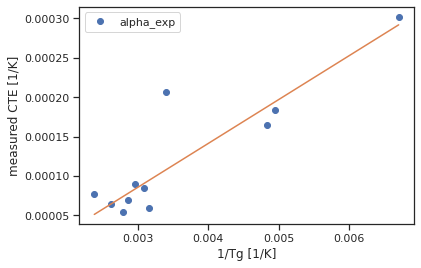

In [57]:
# Plot the prediction
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
f, ax = plt.subplots(1, 1)
df.plot(
    x="1/Tg",
    y="alpha_exp",
    style="o",
    xlabel="1/Tg [1/K]",
    ylabel="measured CTE [1/K]",
    ax=ax,
)
xp = np.linspace(df["1/Tg"].min(), df["1/Tg"].max(), 100)
ax.plot(xp.reshape(-1, 1), model.predict(xp.reshape(-1, 1)), "-")


In [58]:
# For predictions
Tg = 300
alpha = model.predict([1/Tg])[0,0]
alpha

0.00010446539